test.csv


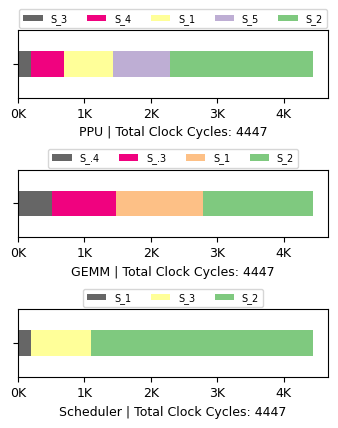

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
import matplotlib
import os

# folder = "/home/jude/Workspace/SECDA-TFLite_v1.2/tensorflow/.data/mm2im_profs/"
folder = "/home/jude/Workspace/SECDA-TFLite_v1.2/tensorflow/.data/test_profs/"
cm = plt.get_cmap("Accent")
# reverse the colors
cm = cm.reversed()

NUM_COLORS = 2
font = {"family": "sans-serif", "weight": "normal", "size": 7}
matplotlib.rc("font", **font)


def plot_h(df):
    for index, row in df.iterrows():
        for col in df.columns:
            if not col.startswith("T_"):
                row = row.drop([col])

        T_rows = [row.split("_")[1] for row in df.columns if row.startswith("T_")]
        T_rows = list(set(T_rows))
        # empty df
        sdf = pd.DataFrame()
        Tlen = T_rows.__len__()
        fig, axs = plt.subplots(Tlen, 1, figsize=(4, Tlen * 1.5))
        for id, T_row in enumerate(T_rows):
            all_T_row_cols = [row for row in df.columns if row.startswith("T_" + T_row)]
            ndf = df[all_T_row_cols]  # only first row
            ndf = ndf[ndf.columns].sort_values(by=0, axis=1, ascending=True)
            ndf = ndf.iloc[index]
            ndf = ndf.rename(T_row)
            ndf = ndf.to_frame().T
            ax = axs[id]
            pd.DataFrame(ndf).plot(
                kind="barh", stacked=True, ax=ax, colormap=cm, width=0.3
            )
            ax.set_prop_cycle(color=[cm(5 + 1.0 * i) for i in range(NUM_COLORS)])
            legends = [
                i.replace("T_", "").replace(T_row, "S") for i in list(ndf.columns)
            ]
            # get sum of all columns
            a = ndf.sum(axis=1)
            total_cycles = a.values[0]
            # ax.legend(
            #     legends,
            #     loc="center right",
            #     bbox_to_anchor=(1.3, 0.5),
            #     prop={"size": 7},
            #     ncol=1,
            # )

            # ax.legend(
            #     legends,
            #     loc="upper center",
            #     bbox_to_anchor=(0.5, 1.35),
            #     prop={"size": 7},
            #     ncol=5,
            # )
            ax.legend(
                legends,
                loc="upper center",
                bbox_to_anchor=(0.5, 1.38),
                prop={"size": 7},
                ncol=5,
            )

            # ax.set_title("")
            # ax.set_xlabel(f"Clock Cycles: {T_row}")
            ax.set_xlabel(f"{T_row} | Total Clock Cycles: {total_cycles}")
            # make axis labels bold
            ax.set_xlabel(ax.get_xlabel(), fontweight="normal" , fontsize=9)

            # change y tick labels names
            ax.set_yticklabels("")
            # make x ticks value in thousands
            ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: "{:,.0f}K".format(x/1000)))
            # ax.set_xticklabels(ax.get_xticklabels(), fontweight="bold")
            # make ticks larger
            ax.tick_params(axis='both', which='major', labelsize=9)
        plt.subplots_adjust(wspace=10, hspace=Tlen / 2.8)
        plt.savefig("filename.png", bbox_inches="tight", dpi=1000)
        plt.show()
        # plt.savefig('filename.png')
        # plt.savefig('filename.png', dpi=300)

        break


# sort files by date
show_all = False
show_x = 1
profs = sorted(os.listdir(folder), key=lambda x: os.path.getctime(folder + x))
profs.reverse()
for prof in profs:
    filename = folder + prof
    df = pd.read_csv(filename, sep=",", header=0)
    print(prof)
    plot_h(df)
    show_x -= 1
    if show_x == 0 and not show_all:
        break
# plt.show()
# plt.savefig('filename.png', dpi=300)

vm_2024-5-3-22-21-21.csv


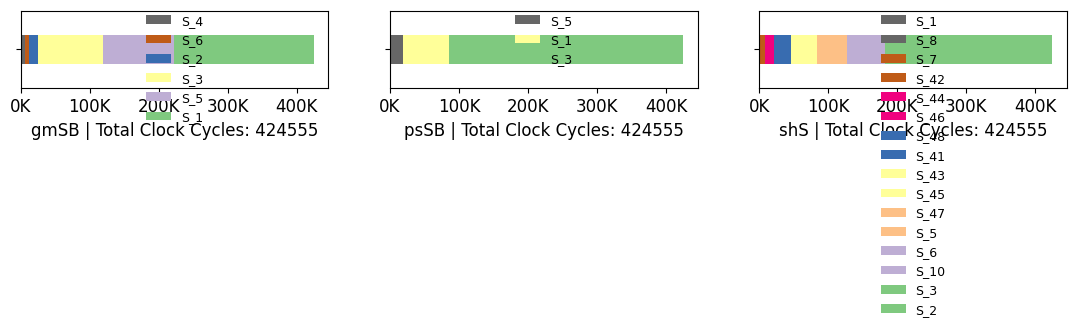

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
import matplotlib
import os

# folder = "/home/jude/Workspace/SECDA-TFLite_v1.2/tensorflow/.data/mm2im_profs/"
folder = "/home/jude/Workspace/SECDA-TFLite_v1.2/tensorflow/.data/vm_profs/"
cm = plt.get_cmap("Accent")
# reverse the colors
cm = cm.reversed()

NUM_COLORS = 2
font = {"family": "sans-serif", "weight": "normal", "size": 7}
matplotlib.rc("font", **font)


def plot_h(df):
    for index, row in df.iterrows():
        for col in df.columns:
            if not col.startswith("T_"):
                row = row.drop([col])

        T_rows = [row.split("_")[1] for row in df.columns if row.startswith("T_")]
        T_rows = list(set(T_rows))
        sdf = pd.DataFrame()
        Tlen = T_rows.__len__()
        fig, axs = plt.subplots(1, Tlen, figsize=(Tlen * 4.5,1))
        for id, T_row in enumerate(T_rows):
            all_T_row_cols = [row for row in df.columns if row.startswith("T_" + T_row)]
            ndf = df[all_T_row_cols]  # only first row
            ndf = ndf[ndf.columns].sort_values(by=0, axis=1, ascending=True)
            ndf = ndf.iloc[index]
            ndf = ndf.rename(T_row)
            ndf = ndf.to_frame().T
            ax = axs[id]
            pd.DataFrame(ndf).plot(
                kind="barh", stacked=True, ax=ax, colormap=cm, width=0.3
            )
            ax.set_prop_cycle(color=[cm(5 + 1.0 * i) for i in range(NUM_COLORS)])
            legends = [
                i.replace("T_", "").replace(T_row, "S") for i in list(ndf.columns)
            ]
            # get sum of all columns
            a = ndf.sum(axis=1)
            total_cycles = a.values[0]

            ax.legend(
                legends,
                loc="upper center",
                bbox_to_anchor=(0.5, 1.1),
                # prop={"size": 9},
                ncol=1,
                frameon=False,
                columnspacing=0.4,
                fontsize=9,
                markerscale=5,
            )
            ax.set_xlabel(f"{T_row} | Total Clock Cycles: {total_cycles}")
            ax.set_xlabel(ax.get_xlabel(), fontweight="normal" , fontsize=12)
            # change y tick labels names
            ax.set_yticklabels("")
            ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: "{:,.0f}K".format(x/1000)))
            ax.tick_params(axis='both', which='major', labelsize=12)
        plt.subplots_adjust(wspace=Tlen / 15, hspace=10)
        plt.savefig("filename.png", bbox_inches="tight", dpi=1000)
        plt.show()

        break


# sort files by date
show_all = False
show_x = 1
profs = sorted(os.listdir(folder), key=lambda x: os.path.getctime(folder + x))
profs.reverse()
for prof in profs:
    filename = folder + prof
    df = pd.read_csv(filename, sep=",", header=0)
    print(prof)
    plot_h(df)
    show_x -= 1
    if show_x == 0 and not show_all:
        break
# plt.show()
# plt.savefig('filename.png', dpi=300)